In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Load dataset
df = pd.read_csv('BigBasket Products.csv')

In [3]:
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [4]:
# 2. Use head function to look for first 12 rows.
df.head(12)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


In [5]:
# 3. Get Description of the data in the DataFrame.
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27549.000000,27555.000000,18919.000000
mean,13778.00000,334.648391,382.056664,3.943295
std,7954.58767,1202.102113,581.730717,0.739217
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.320000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,112475.000000,12500.000000,5.000000


In [6]:
# 4. Find Information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18919 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [7]:
# 5. Find out Top & amp; least sold products.
df.category.max()

'Snacks & Branded Foods'

In [8]:
df.category.min()

'Baby Care'

In [9]:
# 6: Measuring discount on a certain item.
df['discount'] = ((df['market_price'] - df['sale_price']) /  df['market_price'] / 100)

In [10]:
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,0.000000
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",0.000000
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",0.005240
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,0.001534
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...,0.002000
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...,0.001000
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...,0.000000
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori...",0.002000


# Before Analysis drop two columns

In [11]:
df.drop(columns=['index'],axis=1,inplace=True)

In [12]:
df.drop(columns=['description'],axis=1,inplace=True)

In [13]:
df

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,0.000000
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,0.000000
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,0.005240
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,0.001534
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,0.000000
...,...,...,...,...,...,...,...,...,...
27550,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,0.002000
27551,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,0.001000
27552,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,0.000000
27553,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,0.002000


In [14]:
# 7. Find out the Missing Values from the Dataset.
df.isnull().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         6
market_price       0
type               0
rating          8636
discount           6
dtype: int64

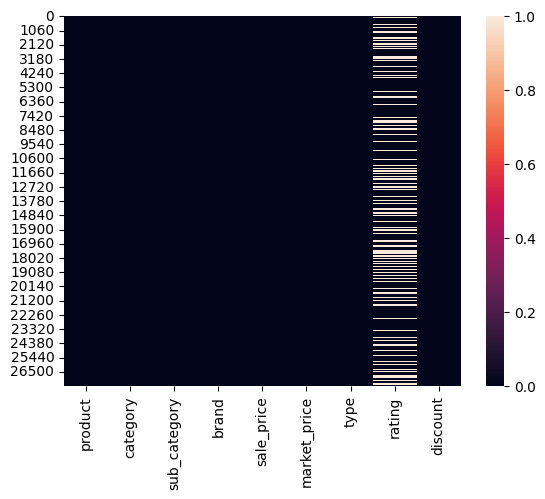

In [15]:
sns.heatmap(df.isnull())
plt.show()

# Checks Duplicated values

In [16]:
df.duplicated().sum()

np.int64(361)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

np.int64(0)

# Checking outliers

<Axes: xlabel='sale_price'>

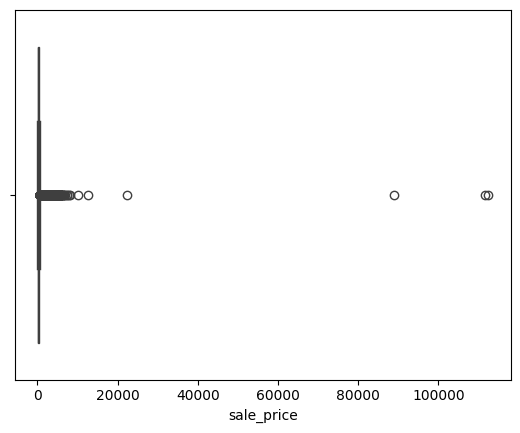

In [19]:
# 8. Find out the outliers from the dataset according to the columns and fill them with the mean.
sns.boxplot(df.sale_price,orient='h')

In [20]:
Q1,Q3 = df.sale_price.quantile([0.25,0.75])
Q1,Q3

(95.0, 351.5125)

In [21]:
IQR = Q3 - Q1
IQR

256.5125

In [22]:
UL = Q3 + 1.75 * (IQR)
LL = Q1 - 1.75 * (IQR)
UL,LL

(800.409375, -353.89687499999997)

In [23]:
df[df.sale_price>UL]

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount
8,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.00,1098.0,Shampoo & Conditioner,3.5,0.0000
51,Peach Syrup,Gourmet & World Food,Drinks & Beverages,Pekers,850.00,850.0,Gourmet Juices & Drinks,4.2,0.0000
69,"Padded Harness - 3/4 inch, Grey Colour","Kitchen, Garden & Pets",Pet Food & Accessories,Glenand,840.00,840.0,Pet Collars & Leashes,NaN,0.0000
91,Hard Anodised Ezee-Pour Saucepan With Lid - L88,"Kitchen, Garden & Pets",Cookware & Non Stick,Hawkins Futura,864.50,910.0,Tawa & Sauce Pan,4.6,0.0005
96,Hair Remover Spray - Foam Lemon,Beauty & Hygiene,Feminine Hygiene,Dimples,1200.00,1200.0,Hair Removal,NaN,0.0000
...,...,...,...,...,...,...,...,...,...
27498,"Juicer - Fruit & Vegetable, Light Green","Kitchen, Garden & Pets",Kitchen Accessories,Ganesh,1071.00,1071.0,Kitchen Tools & Other Accessories,2.0,0.0000
27505,Virgin Coconut Oil,"Foodgrains, Oil & Masala",Edible Oils & Ghee,Merkera,875.00,875.0,Other Edible Oils,NaN,0.0000
27514,Verge & Sheer Perfume For Pair,Beauty & Hygiene,Fragrances & Deos,Skinn by Titan,1615.50,1795.0,Perfume,NaN,0.0010
27538,Quista Pro Advanced Whey Protein Formula forti...,Beauty & Hygiene,Health & Medicine,Himalaya,4500.00,4500.0,Supplements & Proteins,4.0,0.0000


In [24]:
df['sale_price'] = np.where(df.sale_price>UL,UL,df.sale_price)

<Axes: xlabel='sale_price'>

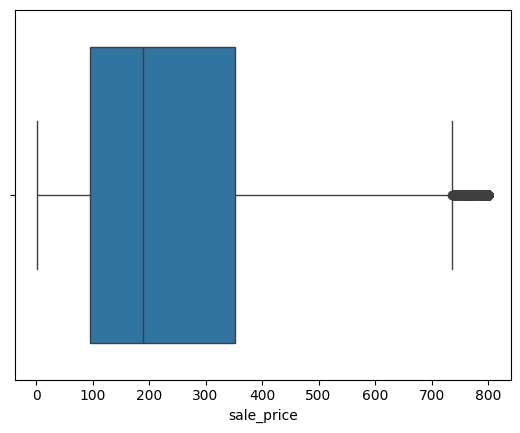

In [25]:
sns.boxplot(df.sale_price,orient='h')

<Axes: xlabel='market_price'>

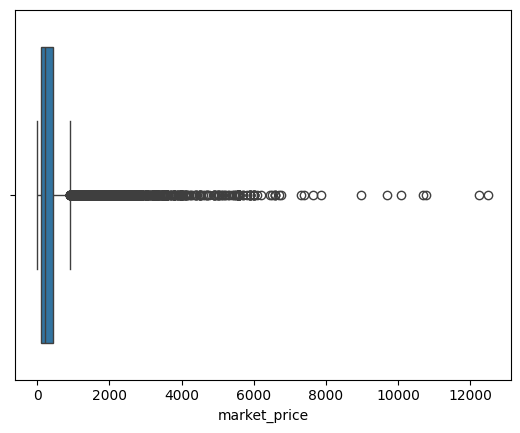

In [26]:
# checking outliers market_price
sns.boxplot(df.market_price,orient='h')

In [27]:
Q1,Q3 = df.market_price.quantile([0.25,0.75])
Q1,Q3

(100.0, 425.0)

In [28]:
IQR = Q3-Q1
IQR

325.0

In [29]:
UL = Q3 + 1.75 * (IQR)
LL = Q1 - 1.75 * (IQR)
UL,LL

(993.75, -468.75)

In [30]:
df[df.market_price>UL]

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount
8,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,800.409375,1098.0,Shampoo & Conditioner,3.5,0.000000
96,Hair Remover Spray - Foam Lemon,Beauty & Hygiene,Feminine Hygiene,Dimples,800.409375,1200.0,Hair Removal,NaN,0.000000
99,"Wonder Diaper Pants - Xtra Large, 12-17 Kg",Baby Care,Diapers & Wipes,Huggies,800.409375,1398.0,Diapers,4.0,0.000941
118,"Adult Dry Cat Food - +1 Year, Ocean Fish","Kitchen, Garden & Pets",Pet Food & Accessories,Maxi Persian,800.409375,999.0,Pet Meals & Treats,NaN,0.000000
120,Stainless Steel Kadai - Induction Bottom With ...,"Kitchen, Garden & Pets",Cookware & Non Stick,Vinod,800.409375,1335.0,Kadai & Fry Pans,3.8,0.001768
...,...,...,...,...,...,...,...,...,...
27465,Matic Top Load Detergent Combo - Washing Powder,Cleaning & Household,Detergents & Dishwash,Ariel,800.409375,1100.0,"Detergent Powder, Liquid",4.6,0.000000
27498,"Juicer - Fruit & Vegetable, Light Green","Kitchen, Garden & Pets",Kitchen Accessories,Ganesh,800.409375,1071.0,Kitchen Tools & Other Accessories,2.0,0.000000
27514,Verge & Sheer Perfume For Pair,Beauty & Hygiene,Fragrances & Deos,Skinn by Titan,800.409375,1795.0,Perfume,NaN,0.001000
27538,Quista Pro Advanced Whey Protein Formula forti...,Beauty & Hygiene,Health & Medicine,Himalaya,800.409375,4500.0,Supplements & Proteins,4.0,0.000000


In [31]:
df['market_price'] = np.where(df.market_price > UL , UL,df.market_price)

<Axes: xlabel='market_price'>

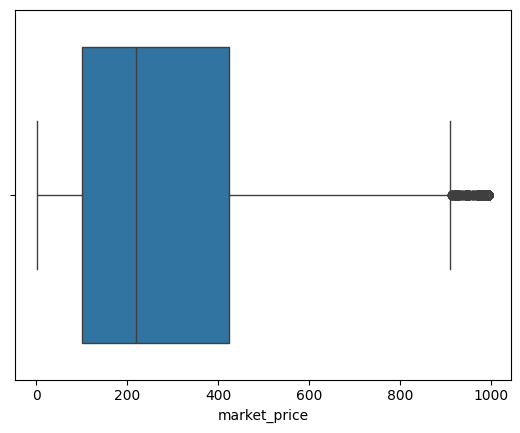

In [32]:
sns.boxplot(df.market_price,orient='h')

# Firstly there are some changes in this dataset to create a visualization

In [33]:
# Delete null values
df.isnull().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         6
market_price       0
type               0
rating          8471
discount           6
dtype: int64

# The ratio of null values in the ratings is high so that instead of deleting the null values. we can fill them and there is no impact in the data.

In [ ]:
df['rating'] = df['rating'].fillna(df.rating.mean())

In [ ]:
df.rating.isnull().sum()

np.int64(0)

In [ ]:
df= df.dropna()

In [ ]:
df.isnull().sum()

product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
discount        0
dtype: int64

In [ ]:
# value count of the category , sub-category , brand
category_count = df['category'].value_counts()
sub_category_count = df['sub_category'].value_counts()
brand_count = df['brand'].value_counts()

In [ ]:
category_count

category
Beauty & Hygiene            7677
Gourmet & World Food        4677
Kitchen, Garden & Pets      3455
Snacks & Branded Foods      2808
Foodgrains, Oil & Masala    2672
Cleaning & Household        2647
Beverages                    883
Bakery, Cakes & Dairy        850
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: count, dtype: int64

In [ ]:
sub_category_count

sub_category
Skin Care                   2220
Health & Medicine           1125
Storage & Accessories       1000
Fragrances & Deos            988
Bath & Hand Wash             973
                            ... 
Mutton & Lamb                 20
Water                         17
Flower Bouquets, Bunches       8
Pork & Other Meats             5
Marinades                      1
Name: count, Length: 90, dtype: int64

In [ ]:
brand_count.head(10)

brand
Fresho              638
bb Royal            539
BB Home             427
DP                  243
Fresho Signature    170
bb Combo            167
Amul                153
INATUR              142
Himalaya            141
Dabur               137
Name: count, dtype: int64

In [ ]:
df.corr(numeric_only= True)

,sale_price,market_price,rating,discount
sale_price,1.000000,0.970653,-0.087349,-0.017042
market_price,0.970653,1.000000,-0.097670,0.009190
rating,-0.087349,-0.097670,1.000000,-0.002610
discount,-0.017042,0.009190,-0.002610,1.000000


<Axes: >

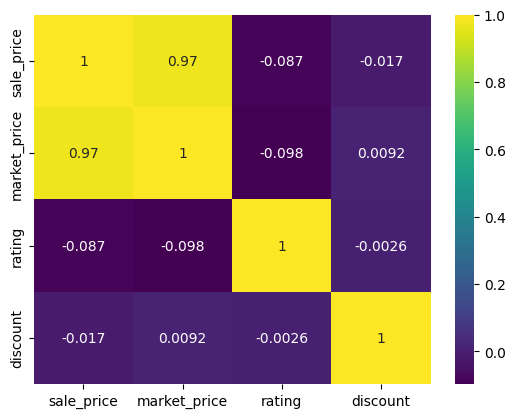

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

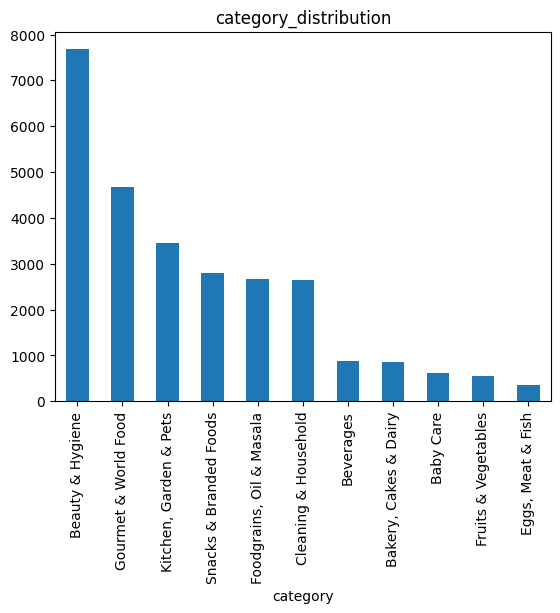

In [ ]:
category_count.plot(kind = 'bar' , title = 'category_distribution')
sns.set_palette('plasma')
plt.show()

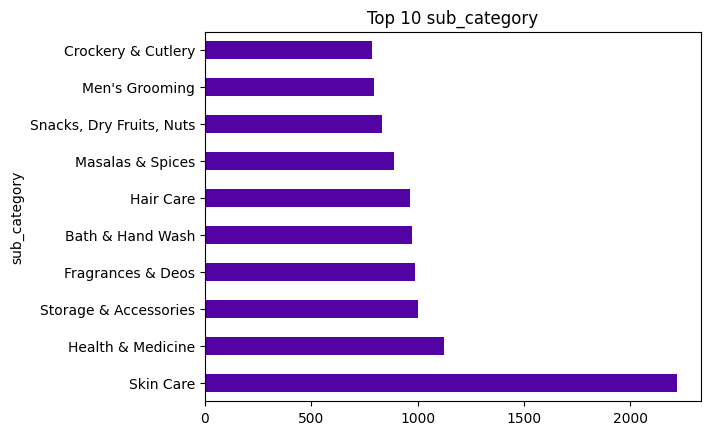

In [ ]:
sub_category_count.head(10).plot(kind='barh', title = 'Top 10 sub_category')
plt.show()

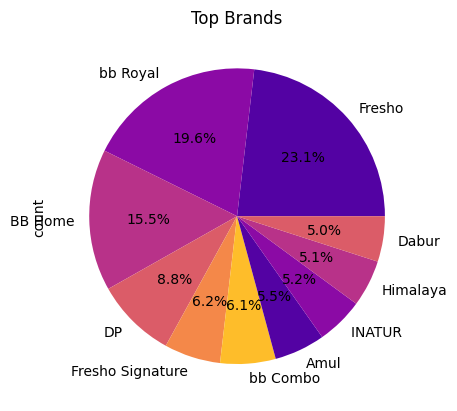

In [ ]:
brand_count.head(10).plot(kind = 'pie' ,autopct='%1.1f%%' ,title = 'Top Brands')
plt.show()

## Comparsion with Market Price ,Sale Price ,Rating ,Discount 

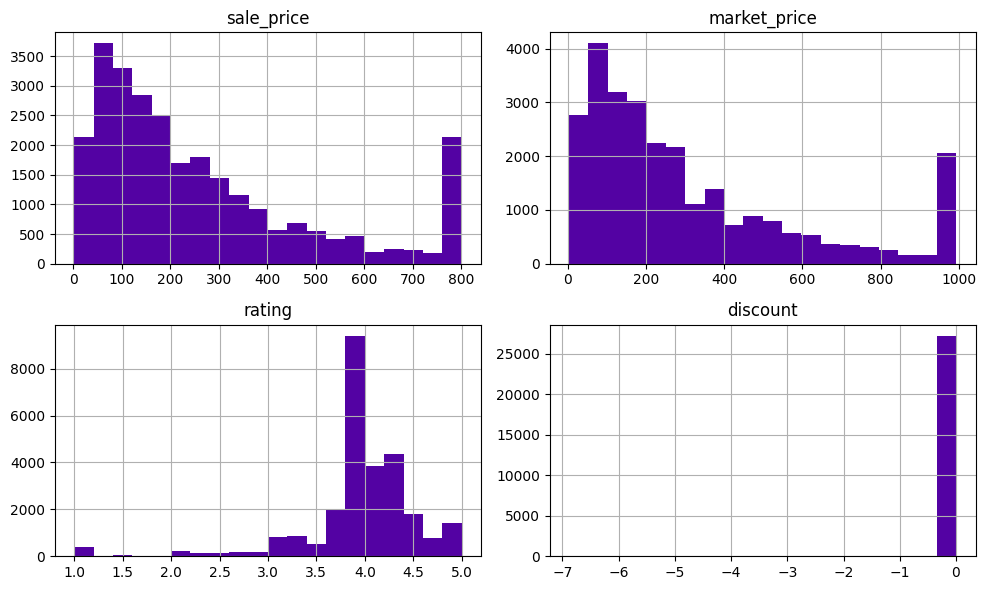

In [ ]:
df[['sale_price', 'market_price', 'rating', 'discount']].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

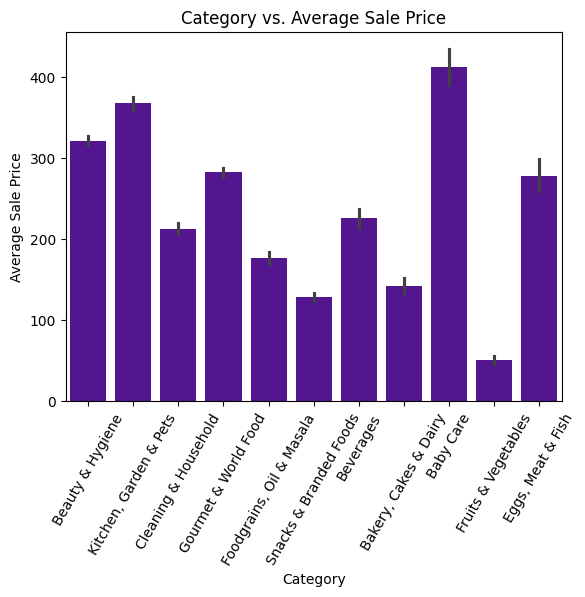

In [ ]:
sns.barplot(x='category', y='sale_price', data=df)
plt.xlabel('Category')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=60)
plt.title('Category vs. Average Sale Price')
plt.show()

## Sale_price vs Frequency

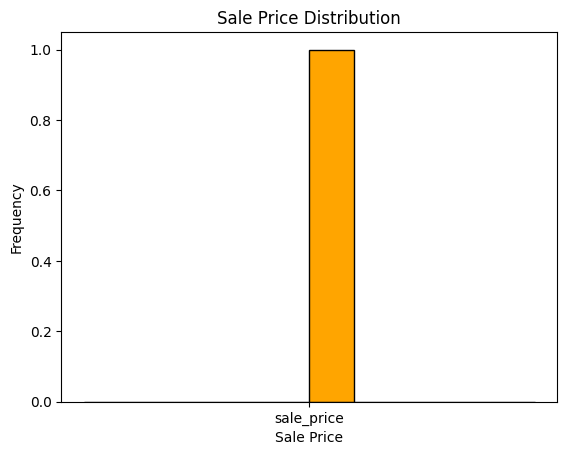

In [ ]:
plt.hist('sale_price', bins=10, color='orange', edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Sale Price Distribution')
plt.show()

## Average Rating By Category

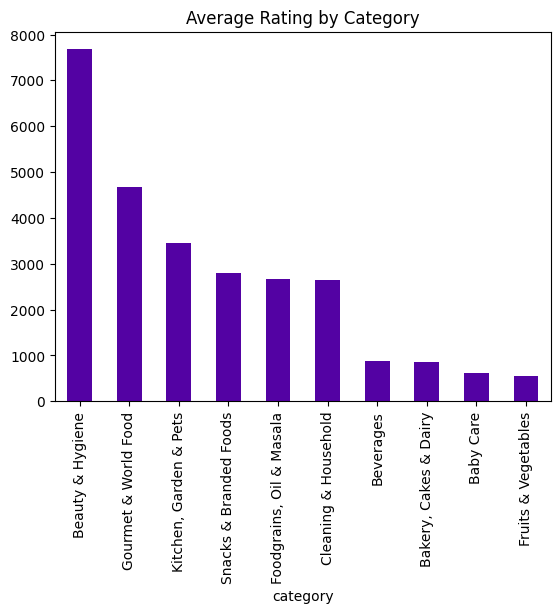

In [ ]:
category_count.head(10).plot(kind='bar', title = 'Top 10 category')
plt.title('Average Rating by Category')
plt.show()


## Distribution of Discounts

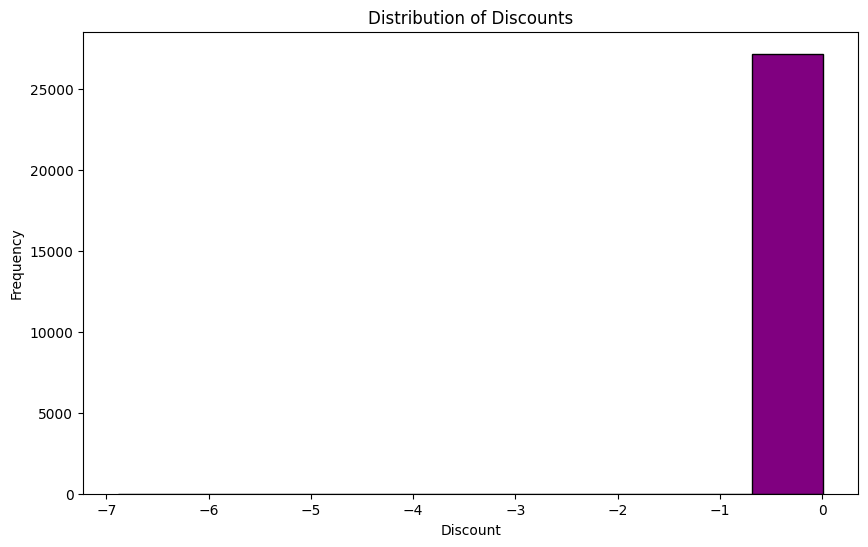

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(df['discount'], bins=10, color='purple', edgecolor='black')
plt.title('Distribution of Discounts')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()


## Category-wise Sales

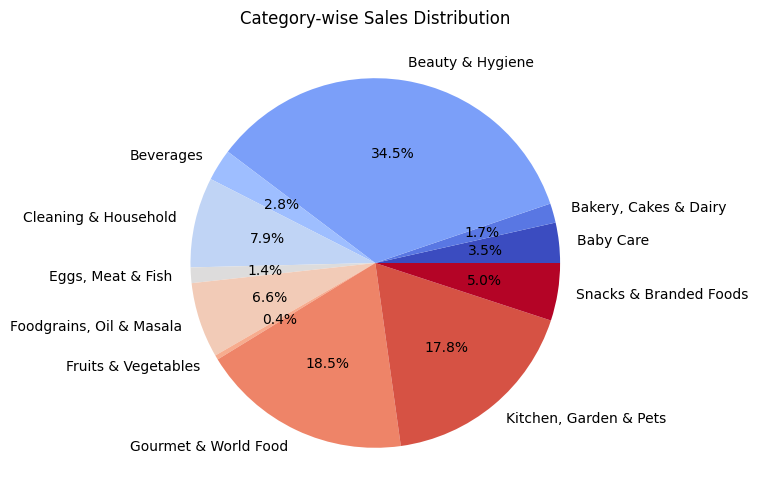

In [ ]:
plt.figure(figsize=(6, 6))
df.groupby("category")["sale_price"].sum().plot.pie(autopct='%1.1f%%', cmap='coolwarm')
plt.title("Category-wise Sales Distribution")
plt.ylabel("")
plt.show()


## Average Rating by Brand

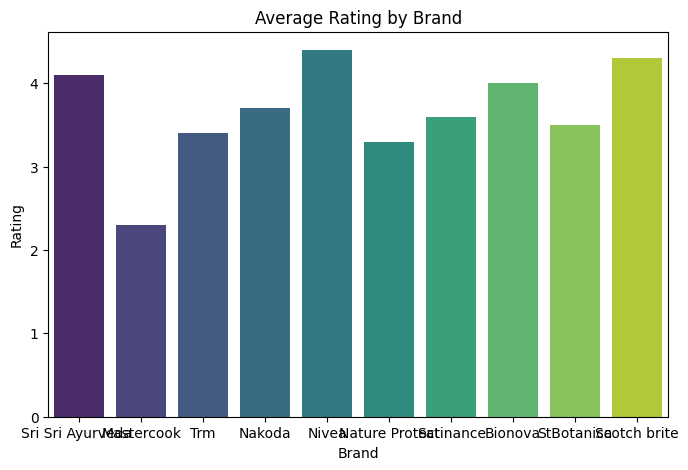

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df.head(10)["brand"], y=df["rating"], palette="viridis")
plt.title("Average Rating by Brand")
plt.xlabel("Brand")
plt.ylabel("Rating")
plt.show()

## Discount Distribution By Frequency

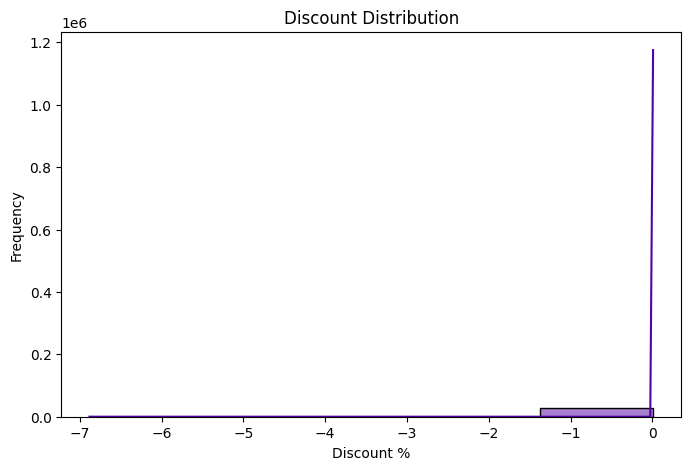

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["discount"], bins=5, kde=True)
plt.title("Discount Distribution")
plt.xlabel("Discount %")
plt.ylabel("Frequency")
plt.show()

# Insight
Market Price or Sales Price they have a lot of outliers.
we are checks to the uses of Box plot.
we are use to the IQR formula to remove the outliers and not damages my dataset.

----> 2
This dataset in one column to the rating.
This column have a lot of null values so i can use to the heatmap to use the null values and fill by the mean.